In [ ]:
# this is the settup, run once

#!pip install tensorflow==2.1.0
import tensorflow as tf
import os
import zipfile

print(tf.__version__)

!gdown --id "1rtLYlLQ9QIMEb5v2eH1D9mu7FpgOqzYq" #dataset real

#local_zip = "/content/tutorial_dataset_SRCIM.zip"
local_zip = "/content/dataset_lab3_SRCIM_400.zip"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

data_root = "/tmp/dataset"

IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)

datagen_kwargs = dict(
    rescale=1./255,
    validation_split=.20
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset = "training",
    shuffle = True,
    target_size = IMAGE_SHAPE
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="validation",
    shuffle=True,
    target_size=IMAGE_SHAPE
)

2.8.2
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1rtLYlLQ9QIMEb5v2eH1D9mu7FpgOqzYq
To: /content/dataset_lab3_SRCIM_400.zip
100% 13.5M/13.5M [00:00<00:00, 143MB/s]
Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

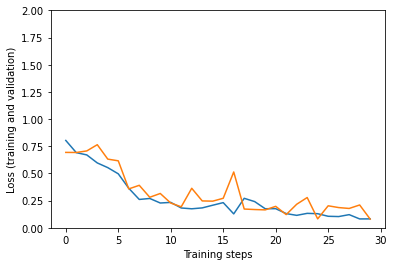

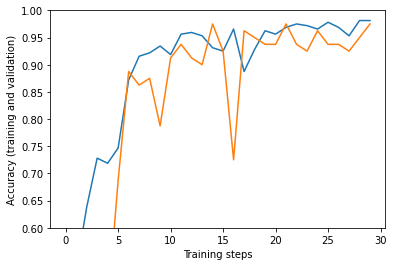

In [ ]:
#this is the mega loop, trust da process
import numpy as np
import matplotlib.pyplot as plt 
i = 0
while (True):
  i=+1
    #_______________________________________________________________________________________________________________________________________________________________
    #this creates a new model
    #_______________________________________________________________________________________________________________________________________________________________

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),
                                  input_shape=(224,224,3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

  #second convolution layer
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                                  input_shape=(224,224,3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
  #third convolution layer
  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),
                                  input_shape=(224,224,3), activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))


  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128))
  model.add(tf.keras.layers.Activation('relu'))


  model.add(tf.keras.layers.Dense(train_generator.num_classes, activation='softmax'))


  model.build([None, 224, 224, 3])
  model.summary()


  optimizer = tf.keras.optimizers.Adam()
  model.compile(
      optimizer=optimizer,
      loss='binary_crossentropy',
      metrics=['acc']
  )




    #_______________________________________________________________________________________________________________________________________________________________
    #this trains the model
    #_______________________________________________________________________________________________________________________________________________________________

  callbacks = [tf.keras.callbacks.EarlyStopping(patience=10)]

  steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
  val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
  hist = model.fit(
      train_generator,
      epochs=30,
      verbose=1,
      callbacks = callbacks,
      steps_per_epoch=steps_per_epoch,
      validation_data=valid_generator,
      validation_steps=val_steps_per_epoch).history


    #_______________________________________________________________________________________________________________________________________________________________
    #this shows the training
    #_______________________________________________________________________________________________________________________________________________________________



  plt.figure()
  plt.ylabel("Loss (training and validation)")
  plt.xlabel("Training steps")
  plt.ylim([0,2])
  plt.plot(hist["loss"])
  plt.plot(hist["val_loss"])
  plt.figure()
  plt.ylabel("Accuracy (training and validation)")
  plt.xlabel("Training steps")
  plt.ylim([0.6,1])
  plt.plot(hist["acc"])
  plt.plot(hist["val_acc"])

    #_______________________________________________________________________________________________________________________________________________________________
    #this shows the final results and saves it
    #_______________________________________________________________________________________________________________________________________________________________

  final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
  print("Final loss: {:.2f}".format(final_loss))
  print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

  name = "model"+str(i)  +".h5"
  if(final_accuracy>0.90):
    break
  model.save(name)

